# Analysis of MI to Win Over DC Strategy


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# Apply the default theme
sns.set_theme()
import warnings
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6, 6


In [2]:
# Loading the DataSets
data = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Removing duplicates

In [3]:
# Check for Duplicate Rows 
duplicated1=data.duplicated()
duplicated2=deliveries.duplicated()
deliveries.drop_duplicates(inplace=True)
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [4]:
# Check for Data Set Deliveries
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
# Check the Shape of both the CSV files

print('Rows and columns of Matches Data Set is',data.shape)
print('Rows and columns of Deliveries Data Set is',deliveries.shape)


Rows and columns of Matches Data Set is (756, 18)
Rows and columns of Deliveries Data Set is (179055, 21)


In [6]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
#Chek for Delivery info
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [8]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
data.replace(to_replace = ['Delhi Daredevils']   , value = ['Delhi Capitals' ] , inplace = True)
deliveries.replace(to_replace = ['Delhi Daredevils'  ] , value = ['Delhi Capitals'], inplace = True)

# Make Deccan Chargers to Sunrisers Hyderabad

data.replace(to_replace = ['Deccan Chargers']   , value = ['Sunrisers Hyderabad' ] , inplace = True)
deliveries.replace(to_replace = ['Deccan Chargers' ] , value = ['Sunrisers Hyderabad'], inplace = True)

In [9]:
# Check for Missing Values for Matches
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
# Check for Columns Where there is NULL Values first Check Winner there are 4 Rows as there is no Result we will put NUll values to 0
data[data['winner'].isnull()]
data['winner'].fillna('Draw', inplace=True)

In [11]:
# Check for Player_of_match as there is no Result put NULL values as NoPlayerMatch
data[data['player_of_match'].isnull()]
data['player_of_match'].fillna('NoManOfMatch', inplace=True)

In [12]:
# Check for City there are 7 NULL values as City doest have significance for Analysis we will replace Null values to Unknow
data[data['city'].isnull()]
data['city'].fillna('Dubai', inplace=True)

In [13]:
# Check for Umpire 1 & Umpire 2 -- Putting Null value to some Umpire as this doesnt have significance
data['umpire1'].fillna('Unknown', inplace=True)
data['umpire2'].fillna('Unknown', inplace=True)

In [14]:
# Umpire 3 has 637 Null Values and doesnt have much signifiance we will Drop this Columns from Dataframe
data=data.drop(['umpire3'],axis=1)


In [15]:
# Check for matches if there is any NULL values Remaining
data.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [16]:
# Check for Missing values for Deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
dtype: int64

In [17]:
# For More Analysis ,let us Merge these two Dataframe
# Check for Any Null Values
data_merge=pd.merge(data,deliveries,left_on='id',right_on='match_id',how='inner')
data_merge.isnull().sum()

id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
f

# For Deliveries Dataframe we have NULL values for Player_dismissed,dismissial_kind,fielder as these can be remain intact as there is Wickets and player haven taken runs or it is a dot ball When Doing modelling we can considerd Null Values to replace some values

# Check for HeatMaps:
The Heat Map procedure shows the distribution of a quantitative variable over all combinations of 2 categorical factors. If one of the 2 factors represents time, then the evolution of the variable can be easily viewed using the map. A gradient color scale is used to represent the values of the quantitative variable. The correlation between two random variables is a number that runs from -1 through 0 to +1 and indicates a strong inverse relationship, no relationship, and a strong direct relationship, respectively.

<AxesSubplot:>

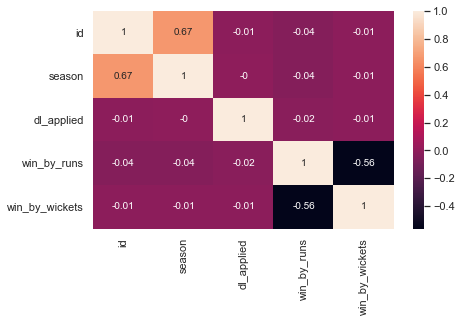

In [18]:
corelation_matrix=data.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

<AxesSubplot:>

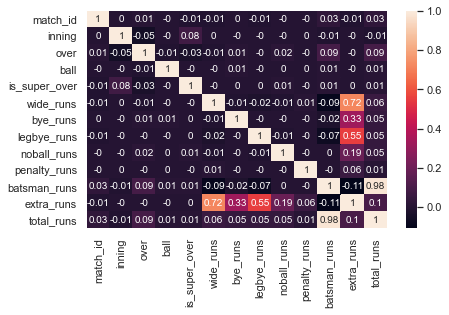

In [19]:
corelation_matrix=deliveries.corr().round(2)
sns.heatmap(data=corelation_matrix,annot=True)

# Wide_runs and extra_runs are highly corerealted ,When builiding Model we can remove one of the variable

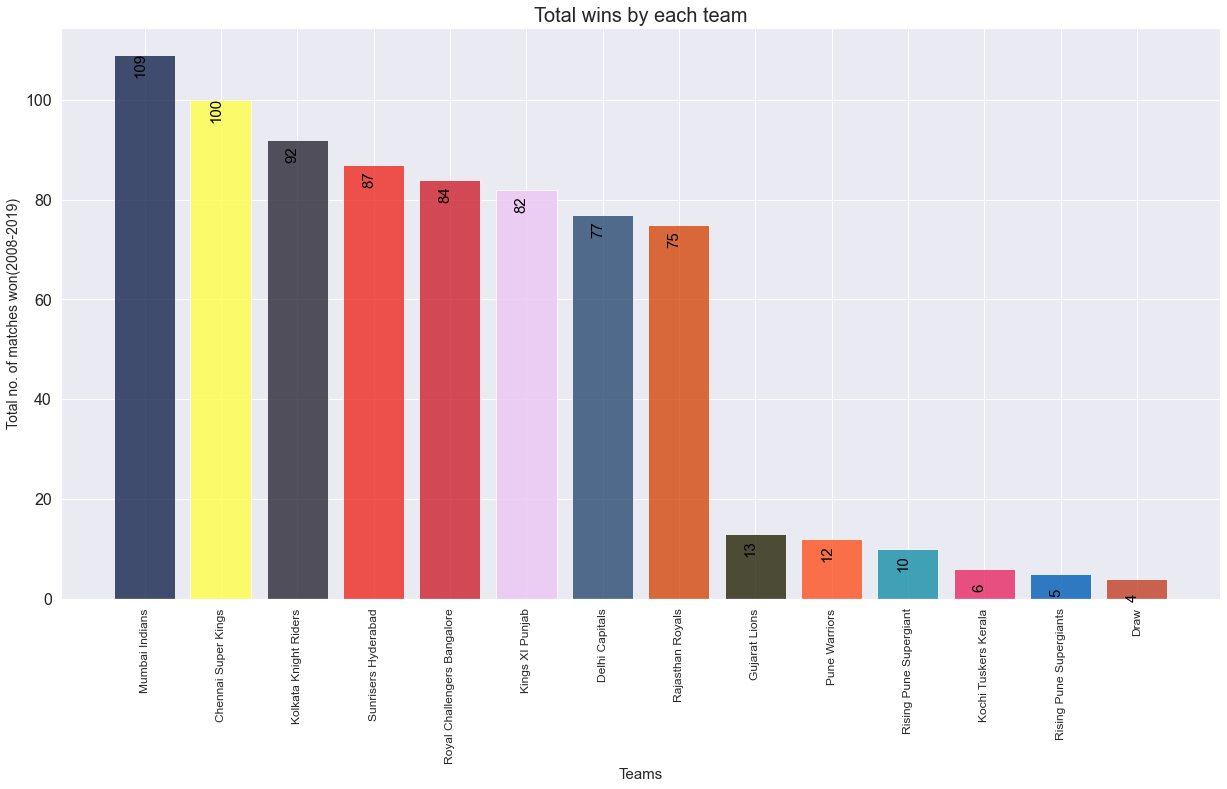

In [20]:
# Total no. of wins by each team
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(data['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
        wins['winner'],
        color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2',
               '#294A73','#D4480B','#242307','#FD511F','#158EA6','#E82865',
               '#005DB7','#C23E25','#E82865']
        ,alpha=0.8)
count=0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

# MOM OF AWARDS

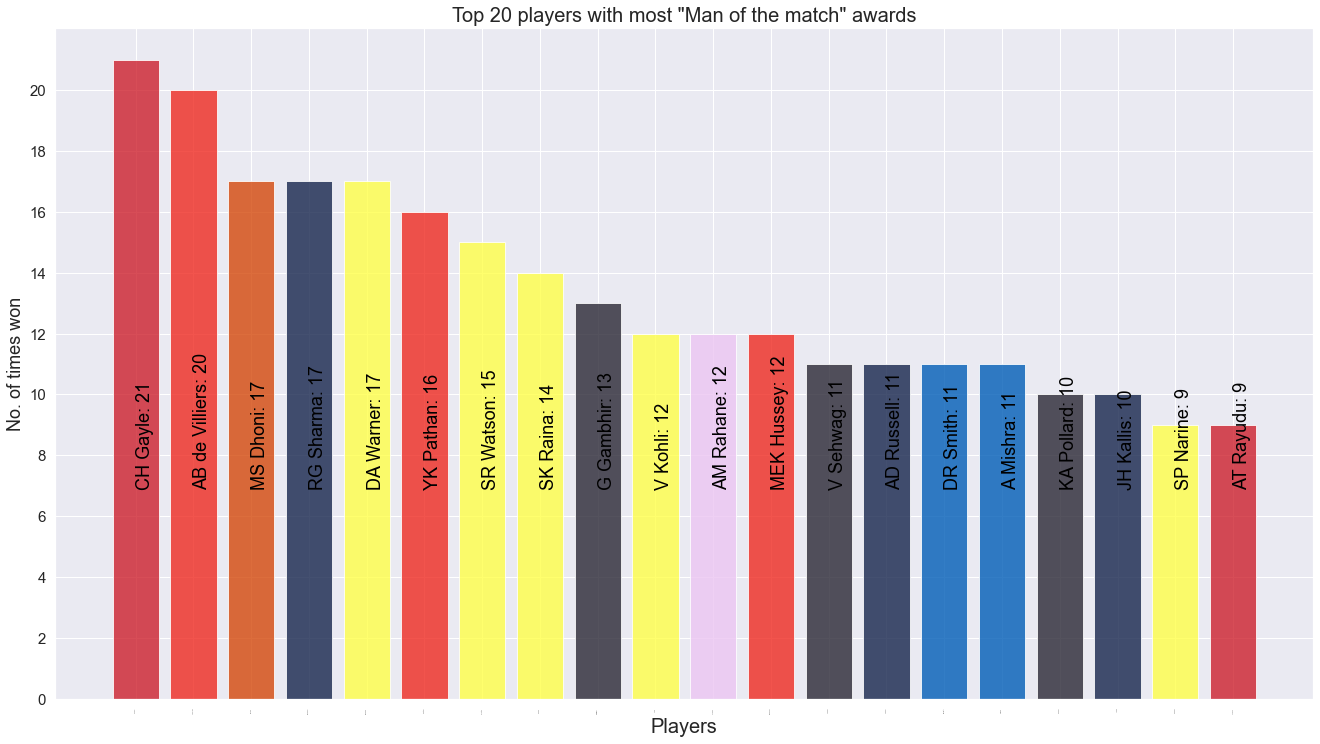

In [21]:
# Man of Match Awards
players=pd.DataFrame(data['player_of_match'].value_counts())
players['name']=players.index
players=players.head(20)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
        color=['#CD202D','#EF2920','#D4480B','#15244C','#FFFF48','#EF2920',
               '#FFFF48','#FFFF48','#292734','#FFFF48','#ECC5F2','#EF2920',
               '#292734','#15244C','#005DB7','#005DB7','#292734','#15244C',
               '#FFFF48','#CD202D'],alpha=0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the match" awards',fontsize=20)
plt.xlabel('Players',fontsize=20)
plt.ylabel('No. of times won',fontsize=18)
plt.tight_layout()
plt.show()


In [22]:
# Filter out Data for Punjab & SRH 
pbrb=data[np.logical_or(np.logical_and(data['team1']=='Mumbai Indians',data['team2']=='Delhi Capitals'),np.logical_and(data['team2']=='Mumbai Indians',data['team1']=='Delhi Capitals'))]
# Combined for Punjab & SRH
pbrb_d= deliveries[np.logical_or(np.logical_and(deliveries['batting_team']=='Mumbai Indians',deliveries['bowling_team']=='Delhi Capitals'),np.logical_and(deliveries['bowling_team']=='Mumbai Indians',deliveries['batting_team']=='Delhi Capitals'))]

In [23]:
# Check for any Duplicate Rows
duplicate = pbrb[pbrb.duplicated()]
duplicate
duplicate_D = pbrb_d[pbrb_d.duplicated()]
duplicate_D

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder


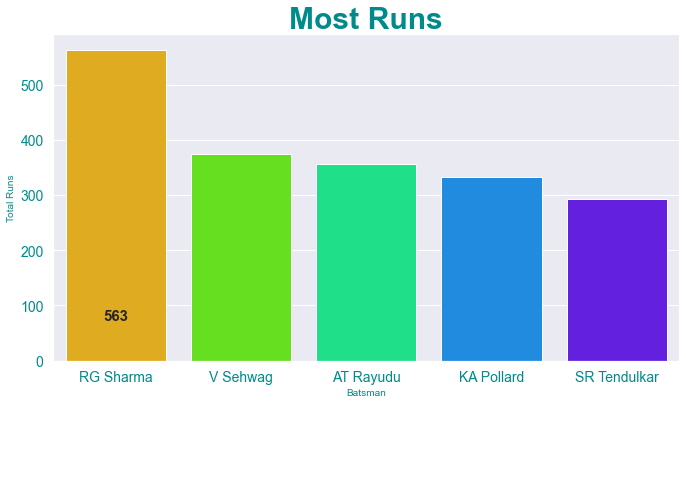

In [24]:
# Most Runs done by Players of both Teams 

#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = pbrb_d.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-500), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)

# Most Wickets Taken by Player from both the Teams

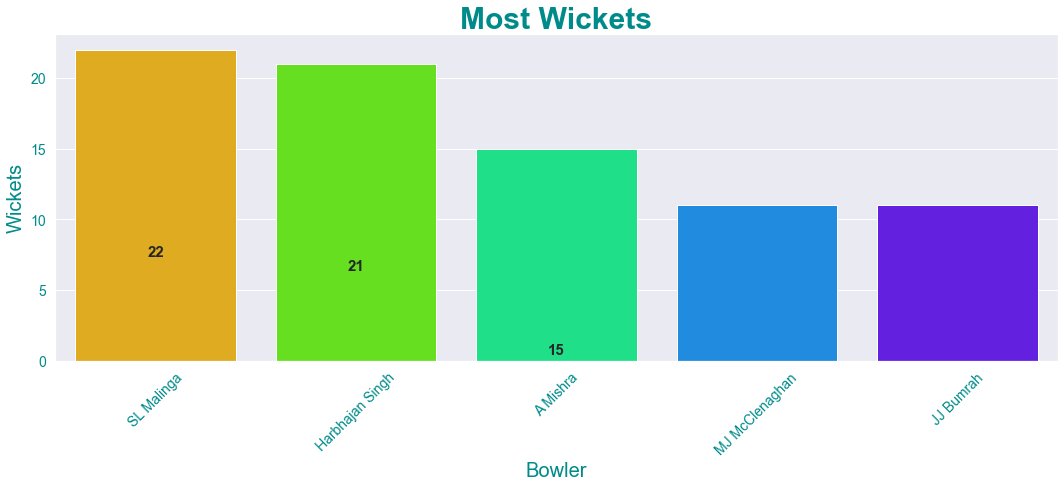

In [25]:
#the top Ten bowler 

#Create new dataframe
wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = pbrb_d[(pbrb_d['player_dismissed'].notnull()) & (~pbrb_d['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(5)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)

#Display the actual values on the bars
for p in ax.patches:
    ax.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()-15), ha = 'center',
                va = 'center', xytext = (0, 10), textcoords = 'offset points',fontweight = 'bold',fontsize=15)


# Head to Head between MI & DC

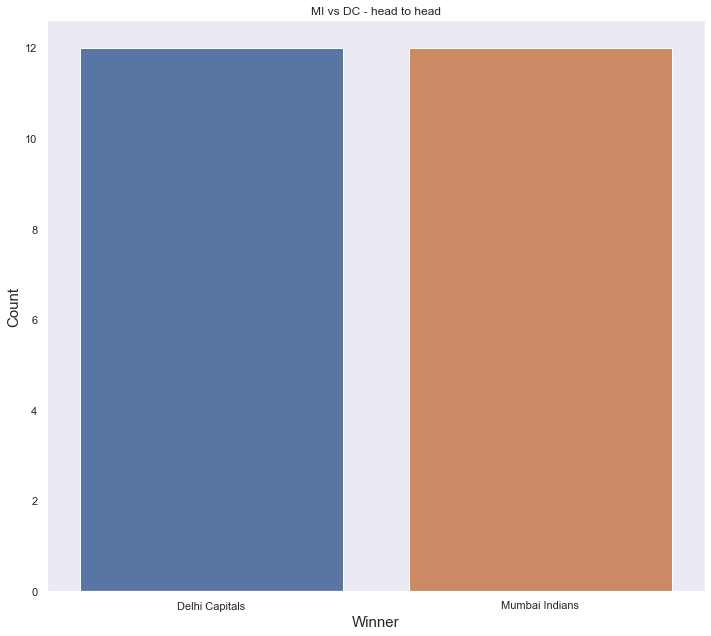

In [26]:
# head to head
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10.5,10.5)
sns.countplot(pbrb['winner'],order=pbrb['winner'].value_counts().index)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
#plt.yticks(fontsize=0)
plt.title('MI vs DC - head to head')
plt.show()

In [27]:
def win_visu_by_toss(team_name):
    datas = data[(data['toss_winner']==team_name) & (data['winner']==team_name)]
    count = datas['toss_decision'].value_counts()
    win_bat = count['bat']/(count['field']+count['bat'])*100
    win_field = count['field']/(count['bat']+count['field'])*100
    print("field_count = "+ str(count['field']))
    print("bat_count = " + str(count['bat']))
    print("Win %age if fielding is choosen = " + str(win_field))
    print("Win %age if batting is choosen = " + str(win_bat))
    print()
    print()
    data1 = [['Fielding', win_field], ['Batting', win_bat]]
    data1 = pd.DataFrame (data1,columns=['Decision','Win_%age'])
    return(px.pie( data1 , values= 'Win_%age' , names='Decision', title='Win %age For '+ team_name + ' for toss decision',color_discrete_sequence=px.colors.sequential.Rainbow))

            

In [28]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Mumbai Indians
field_count = 31
bat_count = 25
Win %age if fielding is choosen = 55.35714285714286
Win %age if batting is choosen = 44.642857142857146




In [29]:
team_name = str(input("Enter Team Name : "))
plot = win_visu_by_toss(team_name)
plot

Enter Team Name : Delhi Capitals
field_count = 30
bat_count = 12
Win %age if fielding is choosen = 71.42857142857143
Win %age if batting is choosen = 28.57142857142857




# In Head to head Equal Chance of Winning, field first have more chances

# Will See that Matches are Placed Outside India ,So to Check what is Record of Winning the Match Outside India i.e UAE

In [30]:
data['venue'].nunique()

41

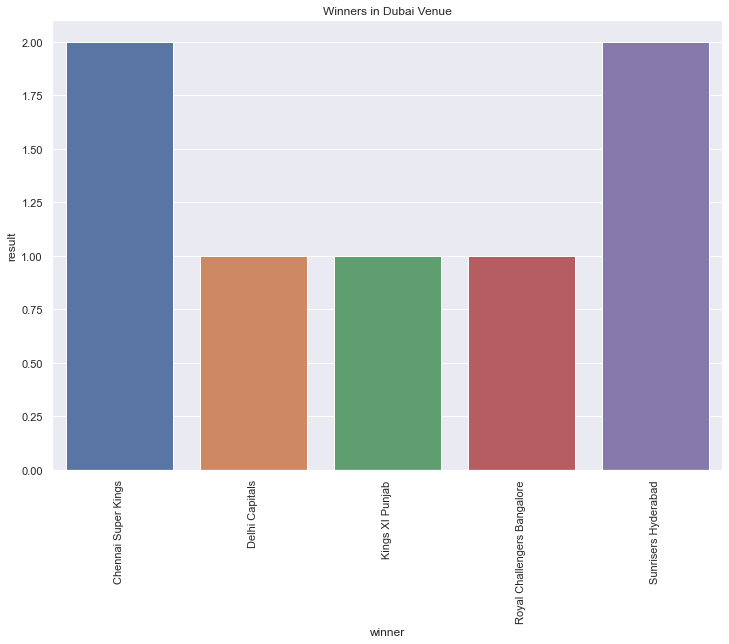

In [41]:
# Todays Match Played in Sharjah Stadium Will Check Hows Team Performed in this Stadium.
Venue =['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'M. A. Chidambaram Stadium', 'Feroz Shah Kotla Ground',
       'M. Chinnaswamy Stadium', 'Rajiv Gandhi Intl. Cricket Stadium',
       'IS Bindra Stadium', 'ACA-VDCA Stadium']

UAE_Winner=data.loc[(data['venue']=='Dubai International Cricket Stadium')]
df_winner=UAE_Winner.groupby('winner').count()['result'].reset_index()
sns.set(rc={'figure.figsize':(10.7,8.27)})
plot = sns.barplot(x="winner", y="result", data=df_winner,ci=20)
plot.set_title('Winners in Dubai Venue')
plt.xticks(np.arange(len(df_winner['winner'])),df_winner['winner'],rotation='vertical')
plt.show()

# In Dubai ,MI has more chances of winning the Match

Wickets fallen for the teams DC  6.21
Wickets fallen for the teams of DC as median 6.0
Wickets fallen for DC in a Dubai venue is 5.0


<AxesSubplot:xlabel='player_dismissed', ylabel='Density'>

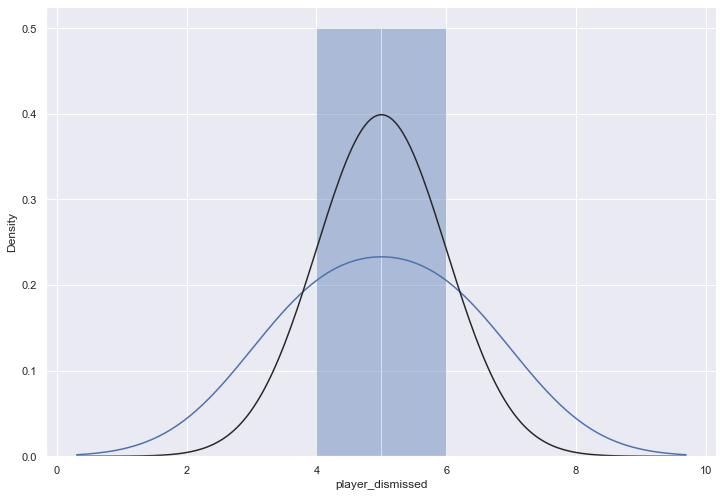

In [39]:
from scipy.stats import norm
# How many Wickets will fall in a match
Delhi_Wickets=pbrb_d[ (pbrb_d['player_dismissed'].notnull()) & ( pbrb_d['batting_team']=='Delhi Capitals') ]
Check=Delhi_Wickets.groupby('match_id').count()['player_dismissed'].reset_index()
print('Wickets fallen for the teams DC ',round(np.mean(Check['player_dismissed']),2))
print('Wickets fallen for the teams of DC as median',round(np.median(Check['player_dismissed']),2))
# Check in Sharjah Stadium
dismissed=data_merge[(data_merge['player_dismissed'].notnull()) & ( data_merge['batting_team']=='Delhi Capitals') & (data_merge['venue']=='Dubai International Cricket Stadium') ]
Check=dismissed.groupby('match_id').count()['player_dismissed'].reset_index()
print('Wickets fallen for DC in a Dubai venue is',np.mean(Check['player_dismissed']))
# Check for Visualisations
# Check for Distplot for Normal Distributions
sns.distplot(Check.player_dismissed, fit=norm,kde=True)

In [43]:
# Check for Name DeKock
pbrb_d[pbrb_d['batsman'].str.contains('Q de Kock')].head(1)
# Check for Sihan kishan
pbrb_d[pbrb_d['batsman'].str.contains('Sharma')].head(1)
# Ishan Kishan
#data_merge[data_merge['bowler'].str.contains('Boult')]['bowler']
#TA Boult

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5547,24,1,Mumbai Indians,Delhi Capitals,6,2,RG Sharma,N Rana,CH Morris,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [46]:
df1=pbrb_d[pbrb_d['batting_team']=='Mumbai Indians']
df1['batsman'].unique()

array(['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharma', 'KA Pollard',
       'KH Pandya', 'HH Pandya', 'Harbhajan Singh', 'MJ McClenaghan',
       'MG Johnson', 'LMP Simmons', 'YV Takawale', 'ST Jayasuriya',
       'DJ Thornely', 'RV Uthappa', 'DJ Bravo', 'AM Nayar', 'SM Pollock',
       'SS Tiwary', 'RR Raje', 'SR Tendulkar', 'DR Smith', 'SD Chitnis',
       'PR Shah', 'L Ronchi', 'JP Duminy', 'AM Rahane', 'DS Kulkarni',
       'Mohammad Ashraful', 'AP Tare', 'AT Rayudu', 'C Madan',
       'DJ Jacobs', 'AC Blizzard', 'A Symonds', 'RE Levi', 'KD Karthik',
       'CJ McKay', 'RP Singh', 'PP Ojha', 'MM Patel', 'RJ Peterson',
       'SL Malinga', 'RT Ponting', 'CJ Anderson', 'MEK Hussey',
       'CM Gautam', 'S Gopal', 'M de Lange', 'JJ Bumrah', 'UBT Chand',
       'TG Southee', 'MJ Guptill', 'AS Yadav', 'E Lewis', 'Ishan Kishan',
       'A Dananjaya', 'M Markande', 'BCJ Cutting', 'Q de Kock',
       'Yuvraj Singh', 'R Salam'], dtype=object)

In [47]:
def Stamina_Score_batsman(data_df,batsman_name):
    # total Runs by batsman for de kock
    Check=pbrb_d[(pbrb_d['batsman']==batsman_name)]
    Total_Runs = Check.groupby('match_id').sum()['batsman_runs'].reset_index()
    mycheck = " Batsman {} Total Runs {} "
    print(mycheck.format(batsman_name,round(np.mean(Total_Runs['batsman_runs'])),2))
    # Runs Scored off boundaries
    Bound_Runs =[4,6]
    Check_Bound=pbrb_d[ ( pbrb_d['batsman']==batsman_name ) & ( pbrb_d['batsman_runs'].isin(Bound_Runs) )]
    Total_Runs_boun = Check_Bound.groupby('match_id').sum()['batsman_runs'].reset_index()
    mycheck_bat = " Batsman {} Total Runs by Boundaries {} "
    print(mycheck_bat.format(batsman_name,round(np.mean(Total_Runs_boun['batsman_runs'])),2))
    # Runs Scored batsman through 1s,2s,3s
    Single_Runs =[1,2,3]
    Check_Single=pbrb_d[ (pbrb_d['batsman']==batsman_name) & ( pbrb_d['batsman_runs'].isin(Single_Runs) )]
    Single_Runs = Check_Single.groupby('match_id').sum()['batsman_runs'].reset_index()
    mycheck_Single = " Batsman {} Single Runs total is {} "
    print(mycheck_Single.format(batsman_name,round(np.mean(Single_Runs['batsman_runs'])),2))
    # Balls faced by batsman
    Ball_faced=pbrb_d[ (pbrb_d['batsman']==batsman_name) & ( ( pbrb_d['batsman_runs'] ==0 ) | ( pbrb_d['batsman_runs'] !=0) ) ]
    Ball_faced_Pl = Ball_faced.groupby('match_id').count()['ball'].reset_index()
    myball_faced = " Batsman {} Total balls Faced  {} "
    print(myball_faced.format(batsman_name,round(np.mean(Ball_faced_Pl['ball'])),2))
    # how many Balls where Batsman was in a crease
    Batsman_Crease=pbrb_d[( pbrb_d['batsman']==batsman_name) | ( pbrb_d['non_striker'] ==batsman_name) ]
    Batsman_Crease_P1 = Batsman_Crease.groupby('match_id').count()['ball'].reset_index()
    myball_faced = " Batsman {} total ball spend at the time of Crease {} "
    print(myball_faced.format(batsman_name,round(np.mean(Batsman_Crease_P1['ball'])),2))
    Stamina_Score_Of_Batsman = (( np.mean(Single_Runs['batsman_runs']) / np.mean(Total_Runs_boun['batsman_runs']) ) +  ( np.mean(Ball_faced_Pl['ball']) / np.mean(Batsman_Crease_P1['ball']))) / ( np.mean(Total_Runs['batsman_runs'])  )    
    return Stamina_Score_Of_Batsman

In [58]:
batsman_name=['PA Patel', 'JC Buttler', 'N Rana', 'RG Sharma', 'KA Pollard',
       'KH Pandya', 'HH Pandya', 'Harbhajan Singh', 'MJ McClenaghan',
       'MG Johnson', 'LMP Simmons', 'YV Takawale', 'ST Jayasuriya',
       'DJ Thornely', 'RV Uthappa', 'DJ Bravo', 'AM Nayar', 'SM Pollock',
       'SS Tiwary', 'RR Raje', 'SR Tendulkar', 'DR Smith',
       'PR Shah', 'JP Duminy', 'AM Rahane',
       'E Lewis', 'Ishan Kishan',
       'Yuvraj Singh']
#batsman_name = str(input("Enter Batsman Name : "))
Stamina_rate_l=[]
for bat in range(len(batsman_name)):
    data_datafr=pbrb_d
    Stamina_rate = round(Stamina_Score_batsman(data_datafr,batsman_name[bat]),2)
    Stamina_rate_l.append(Stamina_rate)


 Batsman PA Patel Total Runs 15 
 Batsman PA Patel Total Runs by Boundaries 10 
 Batsman PA Patel Single Runs total is 7 
 Batsman PA Patel Total balls Faced  15 
 Batsman PA Patel total ball spend at the time of Crease 32 
 Batsman JC Buttler Total Runs 16 
 Batsman JC Buttler Total Runs by Boundaries 19 
 Batsman JC Buttler Single Runs total is 3 
 Batsman JC Buttler Total balls Faced  12 
 Batsman JC Buttler total ball spend at the time of Crease 21 
 Batsman N Rana Total Runs 8 
 Batsman N Rana Total Runs by Boundaries 4 
 Batsman N Rana Single Runs total is 4 
 Batsman N Rana Total balls Faced  9 
 Batsman N Rana total ball spend at the time of Crease 20 
 Batsman RG Sharma Total Runs 31 
 Batsman RG Sharma Total Runs by Boundaries 19 
 Batsman RG Sharma Single Runs total is 14 
 Batsman RG Sharma Total balls Faced  24 
 Batsman RG Sharma total ball spend at the time of Crease 51 
 Batsman KA Pollard Total Runs 18 
 Batsman KA Pollard Total Runs by Boundaries 15 
 Batsman KA Polla

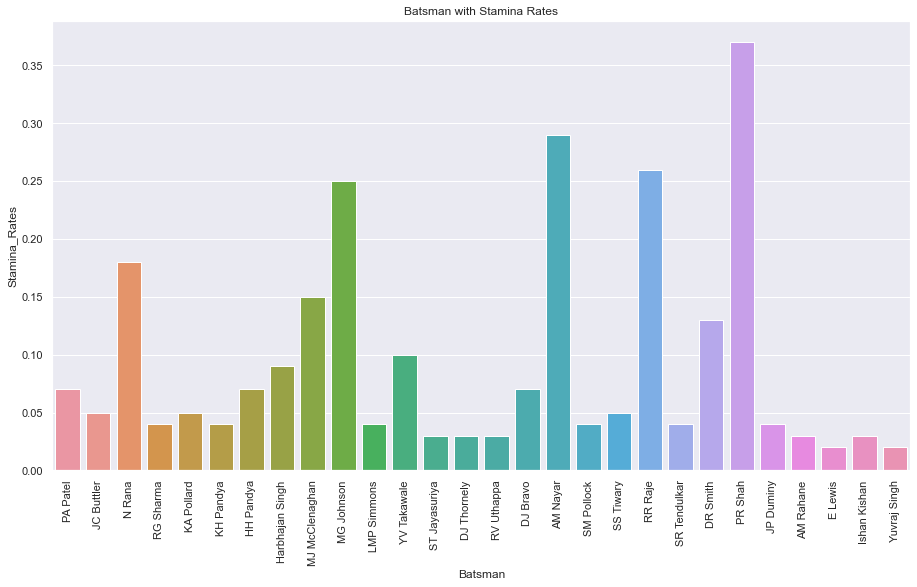

In [59]:
# Create the Dataframe from Lists
Batsman_Stamina = {'Batsman':batsman_name,'Stamina_Rates':Stamina_rate_l}
df_st = pd.DataFrame(Batsman_Stamina)
# plot the Bar plot
sns.set(rc={'figure.figsize':(13.7,8.27)})
plot = sns.barplot(x="Batsman", y="Stamina_Rates", data=df_st)
plot.set_title('Batsman with Stamina Rates')
plt.xticks(np.arange(len(batsman_name)),batsman_name,rotation='vertical')
plt.show()

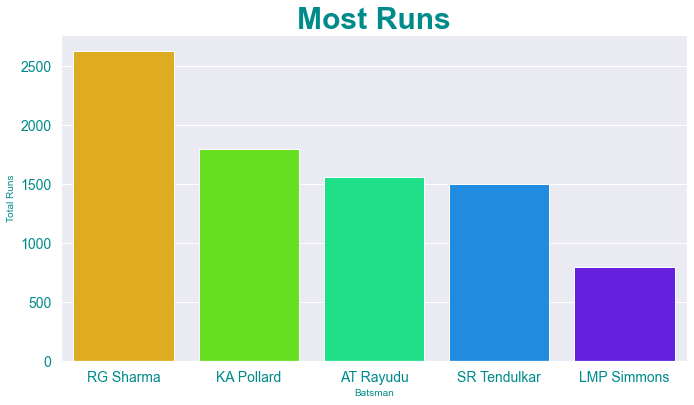

In [66]:
# Check for Mumbai Current Batsman ,What is chance of winning the Match of MI
MI_won=data_merge[ (data_merge['winner']=='Mumbai Indians') & (data_merge['batting_team']=='Mumbai Indians') ]

#Create new dataframe
most_runs = pd.DataFrame()

#KKR_Runs=deliveries[(deliveries['bowling_team']=='Royal Challengers Bangalore') & (deliveries['batting_team']=='Kolkata Knight Riders') ]
# From the 'deliveries' dataframe groupby rows based off 'batsman' column, perform sum on them, fetch only 
# the 'batsman_runs' column, sort them and fetch top 10 results
most_runs['Total Runs'] = MI_won.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(5)

#Give a name to the index and reset the index to make it a column
most_runs.index.names = ['Batsman']
most_runs.reset_index(inplace=True)

#Plot the graph
plt.figure(figsize=(10,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Runs',fontdict=font)
ax = sns.barplot(x='Batsman',y='Total Runs',data = most_runs,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(10)
ax.yaxis.label.set_size(10)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'SL Malinga'),
  Text(1, 0, 'Harbhajan Singh'),
  Text(2, 0, 'JJ Bumrah'),
  Text(3, 0, 'MJ McClenaghan'),
  Text(4, 0, 'KA Pollard')])

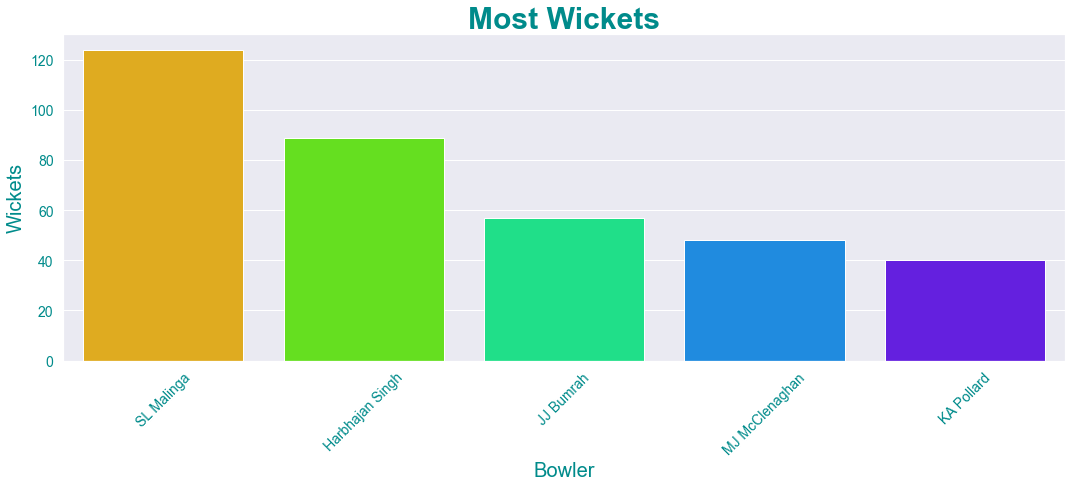

In [67]:
# Check for Mumbai Bowler ,What is chance of winning the Match of MI
MI_won=data_merge[ (data_merge['winner']=='Mumbai Indians') & (data_merge['bowling_team']=='Mumbai Indians') ]

wickets = pd.DataFrame()
dismissal = pd.DataFrame()

dismissal = MI_won[(MI_won['player_dismissed'].notnull()) & (~MI_won['dismissal_kind'].isin(['run out','retired hurt','obstructing the field']))]
wickets['Wickets'] = dismissal.groupby('bowler').count()['player_dismissed'].sort_values(ascending=False).head(5)

#Give name to the index and reset the index to make it a column
wickets.index.names = ['Bowler']
wickets.reset_index(inplace=True)


#Plot the graph
plt.figure(figsize=(16,6))
font = {'color':  'darkcyan',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Most Wickets',fontdict=font)
ax = sns.barplot(x='Bowler',y='Wickets',data = wickets,palette='gist_rainbow')
ax.xaxis.label.set_color('darkcyan')
ax.yaxis.label.set_color('darkcyan')
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', colors='darkcyan', labelsize=14)
plt.xticks(rotation=45)


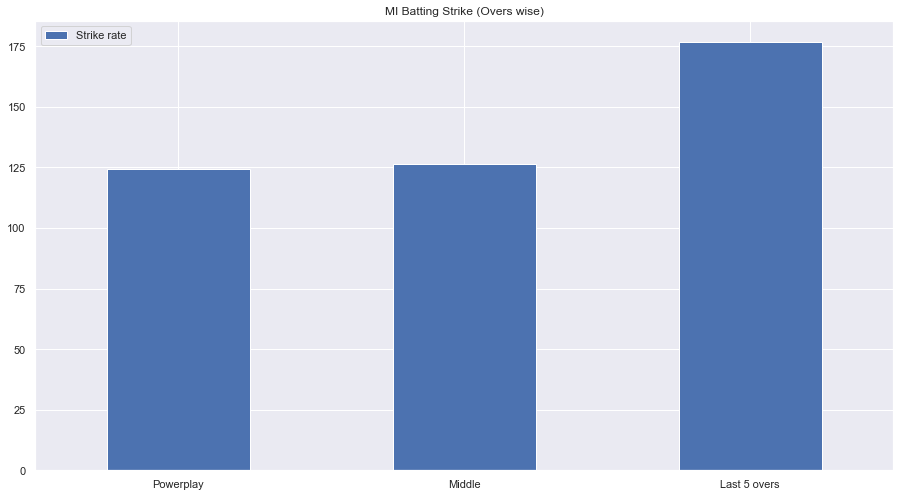

In [72]:
# Team batting strike of MI rate across different phases of a match:

powerplay_df = data_merge[(data_merge['over']<6) & (data_merge['winner']=='Mumbai Indians')]
middle_df = data_merge[(data_merge['over']>6) & (data_merge['over']< 15) & (data_merge['winner']=='Mumbai Indians')]
last_df = data_merge[(data_merge['over']>15) & (data_merge['winner']=='Mumbai Indians')]

powerplay_batting_df = powerplay_df[powerplay_df['batting_team']=='Mumbai Indians']
middle_batting_df = middle_df[middle_df['batting_team']=='Mumbai Indians']
last_batting_df = last_df[last_df['batting_team']=='Mumbai Indians']

sr1=(np.sum(powerplay_batting_df['total_runs'].values)/powerplay_batting_df.shape[0])*100
sr2=(np.sum(middle_batting_df['total_runs'].values)/middle_batting_df.shape[0])*100
sr3=(np.sum(last_batting_df['total_runs'].values)/last_batting_df.shape[0])*100

#plot
data = {"Strike rate":[sr1,sr2,sr3]
        };

index  = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame       
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
axes = dataFrame.plot.bar(rot=0, title="MI Batting Strike (Overs wise)").get_figure()

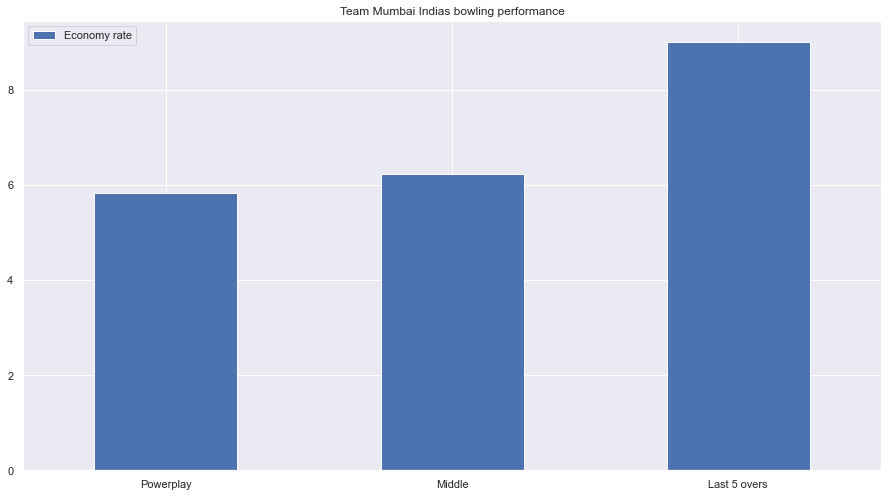

In [75]:
powerplay_bowling_df = data_merge[(data_merge['bowling_team']=='Mumbai Indians') & (data_merge['over']<6) & (data_merge['winner']=='Mumbai Indians')]
middle_bowling_df = data_merge[(data_merge['over']>6) & (data_merge['bowling_team']=='Mumbai Indians')  & (data_merge['over']< 15) & (data_merge['winner']=='Mumbai Indians')]
last_bowling_df = data_merge[(data_merge['over']>15) & (data_merge['bowling_team']=='Mumbai Indians') & (data_merge['winner']=='Mumbai Indians')]


temp = powerplay_bowling_df.groupby('match_id').apply(lambda x:x['total_runs'].sum()).reset_index()
avg1=np.median(temp[0].values)
er1 = avg1/6.0

temp = middle_bowling_df.groupby('match_id').apply(lambda x:x['total_runs'].sum()).reset_index()
avg2=np.median(temp[0].values)
er2 = avg2/9.0

temp = last_bowling_df.groupby('match_id').apply(lambda x:x['total_runs'].sum()).reset_index()
avg3=np.median(temp[0].values)
er3 = avg3/5.0

data = {"Economy rate":[er1,er2,er3] };
index = ["Powerplay", "Middle", "Last 5 overs"];

# Dictionary loaded into a DataFrame 
dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart
fig = dataFrame.plot.bar(rot=0, title="Team Mumbai Indias bowling performance").get_figure()

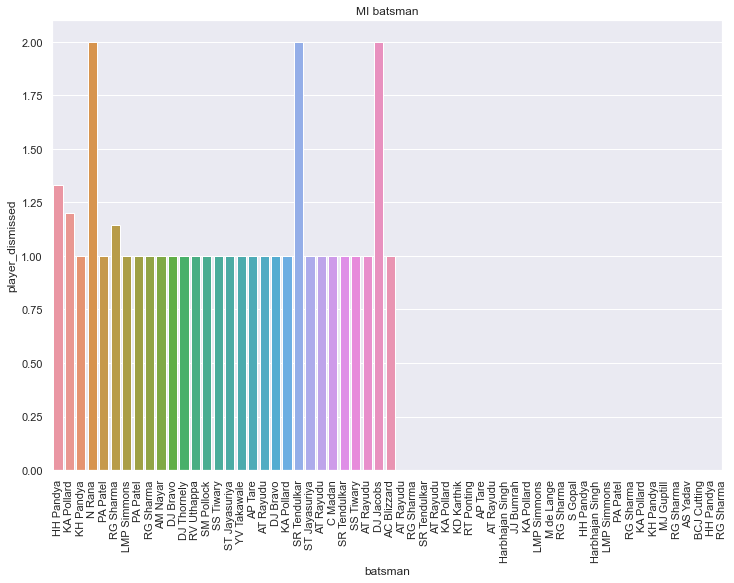

In [86]:
# Check for Rohit Sharma ,De Kock,Pollard,Surya Yadav,Ishan Kishan,HH Pandya,Kurnal Pandya which player gets out most against Delhibatsman_name=['JC Buttler', 'N Rana', 'RG Sharma', 'KA Pollard',
df_check_batsman=data_merge[ (data_merge['batting_team']=='Mumbai Indians') & (data_merge['bowling_team']=='Delhi Capitals')   & (data_merge['winner']=='Mumbai Indians') & (data_merge['player_dismissed'].notnull())]
df_name=df_check_batsman.groupby(['match_id','batsman']).count()['player_dismissed'].reset_index()
sns.set(rc={'figure.figsize':(10.7,8.27)})
plot = sns.barplot(x="batsman", y="player_dismissed", data=df_name,ci=20)
plot.set_title('MI batsman')
plt.xticks(np.arange(len(df_name['batsman'])),df_name['batsman'],rotation='vertical')
plt.show()

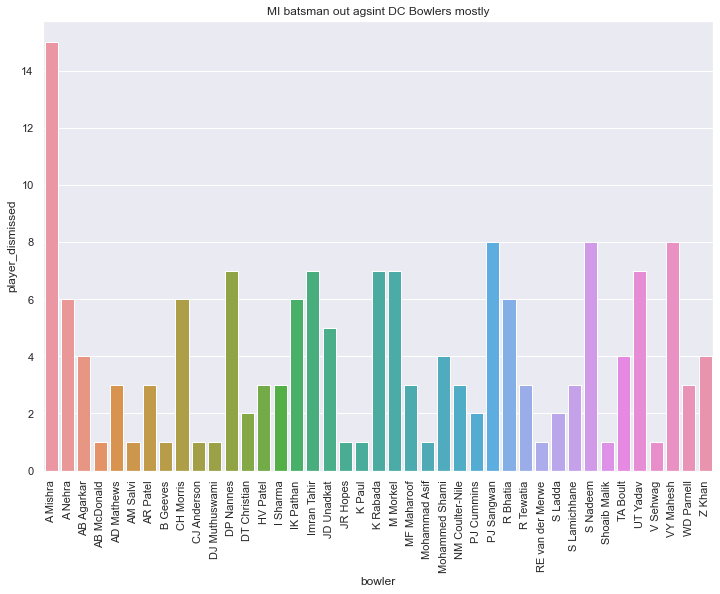

In [92]:
# Which DC Bowler gets MI Batsman wickets most
df_bowler=pbrb_d[ (pbrb_d['bowling_team']=='Delhi Capitals') & (pbrb_d['player_dismissed'].notnull())]
df_na=df_bowler.groupby(['bowler']).count()['player_dismissed'].reset_index()
sns.set(rc={'figure.figsize':(10.7,8.27)})
plot = sns.barplot(x="bowler", y="player_dismissed", data=df_na,ci=20)
plot.set_title('MI batsman out agsint DC Bowlers mostly')
plt.xticks(np.arange(len(df_na['bowler'])),df_na['bowler'],rotation='vertical')
plt.show()

In [110]:
df_total_runs=data_merge[ (data_merge['batting_team']=='Mumbai Indians') & ( data_merge['toss_decision']=='bat') & (data_merge['winner']=='Mumbai Indians')]
df_r=df_total_runs.groupby(['match_id']).sum()['total_runs'].reset_index()
max(df_r['total_runs'])

212

In [108]:
df_total_runs=data_merge[ (data_merge['batting_team']!='Mumbai Indians') & ( data_merge['toss_decision']=='field') & (data_merge['winner']=='Mumbai Indians')]
df_r=df_total_runs.groupby(['match_id']).sum()['total_runs'].reset_index()
max(df_r['total_runs'])

204

In [109]:
df_total_runs=data_merge[ (data_merge['batting_team']!='Mumbai Indians') & ( data_merge['toss_decision']=='field') & (data_merge['winner']=='Mumbai Indians')]
df_r=df_total_runs.groupby(['match_id']).sum()['total_runs'].reset_index()
min(df_r['total_runs'])

66

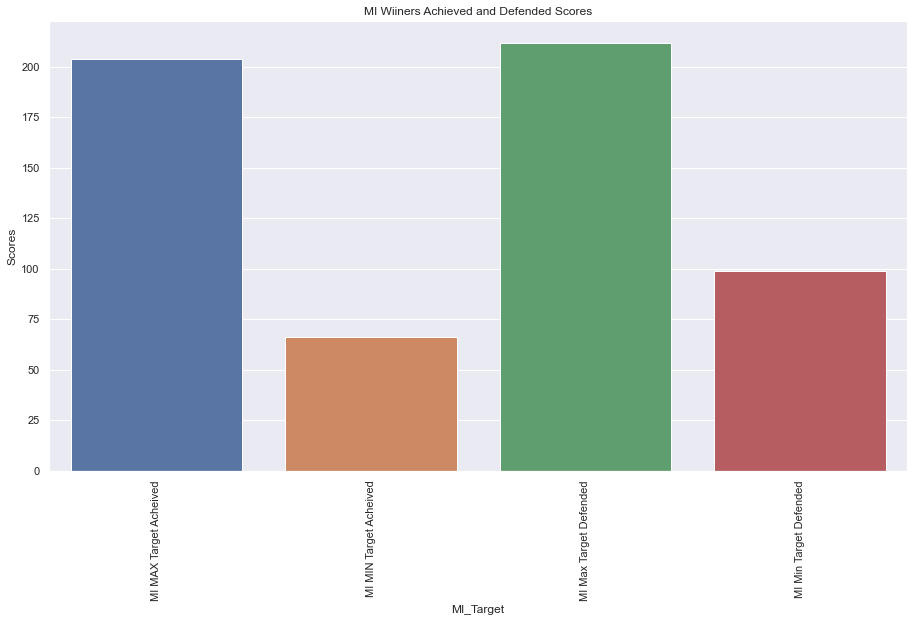

In [112]:
MI_lists=['MI MAX Target Acheived','MI MIN Target Acheived','MI Max Target Defended','MI Min Target Defended']
MI_Score=[204,66,212,99]
MI_Runs = {'MI_Target':MI_lists,'Scores':MI_Score}
df_ste = pd.DataFrame(MI_Runs)
# plot the Bar plot
sns.set(rc={'figure.figsize':(13.7,8.27)})
plot = sns.barplot(x="MI_Target", y="Scores", data=df_ste)
plot.set_title('MI Wiiners Achieved and Defended Scores')
plt.xticks(np.arange(len(MI_lists)),MI_lists,rotation='vertical')
plt.show()

In [93]:
# Check for Machine Learning for Predicting Winners
matches =data.copy()

In [ ]:
# Make Delhi Daredevlis and Delhi Capitals Merge as Delhi Capitals
matches.replace(to_replace = ['Delhi Capitals']   , value = ['Delhi Daredevils' ] , inplace = True)
#deliveries.replace(to_replace = ['Delhi Capitals'  ] , value = ['Delhi Daredevils'], inplace = True)
matches['winner'].fillna('Draw', inplace=True)
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)
matches['city'].fillna('Dubai',inplace=True)
matches.describe()
dicVal = encode['winner']

In [161]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
df = pd.DataFrame(matches)

In [162]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

team1            int64
team2            int64
city             int32
toss_decision    int32
toss_winner      int64
venue            int32
winner           int64
dtype: object

In [163]:
#feature selection
X = df.drop('winner', axis=1)
target = df['winner']
target=target.astype(int)

In [165]:
#Splitting the data into training and testing data and scaling it
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
#print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

              precision    recall  f1-score   support

           1       0.52      0.75      0.61        20
           2       0.58      0.83      0.68        18
           3       0.71      0.52      0.60        23
           5       0.38      0.47      0.42        17
           6       0.43      0.67      0.52         9
           7       0.43      0.15      0.22        20
           8       0.50      0.50      0.50         2
           9       0.45      0.31      0.37        16
          10       0.39      0.37      0.38        19
          11       0.25      0.20      0.22         5
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2

    accuracy                           0.48       152
   macro avg       0.39      0.40      0.38       152
weighted avg       0.48      0.48      0.46       152

Accuracy of random forest classifier on test set: 0.4803


In [ ]:
# Check for Todays Predictions

#'team1', 'team2', 'venue', 'toss_winner','city','toss_decision'
team1='MI'
team2='SRH'
toss_winner='MI'
input=[dicVal[team1],dicVal[team2],'15',dicVal[toss_winner],'16','0']
input = np.array(input).reshape((1, -1))
output=randomForest.predict(input)
print(list(dicVal.keys())[list(dicVal.values()).index(output)]) #find key by value search output